# TF2API

## 학습목표

* Tensorflow V2의 개요와 특징을 파악한다.
* Tensorflow V2의 3가지 주요 API 구성 방식을 이해하고 활용할 수 있다.
* GradientTape를 활용해 보고 좀 더 로우 레벨의 딥러닝 구현 방식을 이해한다.

## TensorFlow2 API로 모델 구성하기

### 모델을 작성하는 3가지 방법

1. Sequential
2. Functional
3. Model Subclassing

#### 1. Sequential

```python
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(__넣고싶은 레이어__)
model.add(__넣고싶은 레이어__)
model.add(__넣고싶은 레이어__)

model.fit(x, y, epochs=10, batch_size=32)
```

1. 입력부터 출력까지 차곡차곡 쌓아가면 된다.
2. 입력과 출력이 여러개 인 경우는 적합하지 않다.
3. 반드시 입력 1가지, 출력 1가지이여야 한다.
4. [참고 링크](https://www.tensorflow.org/tutorials/quickstart/beginner)

#### 2. Functional

```python
import tensorflow as tf
from tensorflow import keras

inputs = keras.Input(shape=(__원하는 입력값 모양__))
x = keras.layers.__넣고싶은 레이어__(관련 파라미터)(input)
x = keras.layser.__넣고싶은 레이어__(관련 파라미터)(x)
outputs = keras.layers.__넣고싶은 레이어__(관련 파라미터)(x)

model = keras.model(inputs=inputs, outputs=outputs)
model.fit(x,y, epochs=10, batch_size=32)
```

1. Sequential Model 과 다른 점은 keras.model 을 사용하는 점.
2. Sequential Model 보다 더 일반적인 접근.
3. Functional API를 활용하면 더 자유로운 모델링이 가능하다.
4. 입력과 출력을 규정해서 모델 전체를 규정할 수 있다.
5. [참고 링크](https://www.tensorflow.org/guide/keras/functional)

#### 3. Tensorflow2 Subclassing

```python
import tensorflow as tf
from tensorflow import keras

class CustomModel(keras.Model):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.__정의하고자 하는 레이어__()
        self.__정의하고자 하는 레이어__()
        self.__정의하고자 하는 레이어__()
    
    def call(self, x):
        x = self.__정의하고자 하는 레이어__(x)
        x = self.__정의하고자 하는 레이어__(x)
        x = self.__정의하고자 하는 레이어__(x)


        return x


model = CustomModel()
model.fit(x,y, epochs=10, batch_size=32)

1. 가장 자유로운 모델링 - 본질적으로 Functional 과 차이는 없다.
2. 3개 모델 다 keras.Model 을 상속받은 모델 클래스를 만드는 것.
3. __init__() method 안에서 layer 구성을 정의.
4. call() method 안에서 layer 간 forward propagation(순전파)를 구현.
5. [참고 링크](https://www.tensorflow.org/tutorials/quickstart/advanced)

## Tensorflow2 API로 모델 작성하기 - MNIST

### (0) 공통 설정

#### 모듈 불러오기

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers
import numpy as np
import datetime

import pandas as pd

pd.Data

##### Tensorflow GPU 확인

In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print(tf.config.list_physical_devices('GPU'))
device_lib.list_local_devices()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2022-08-18 15:08:42.053866: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-18 15:08:42.508588: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /device:GPU:0 with 6668 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14369620468612524595
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6992625664
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10244475939665008107
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

#### Data 불러오기

In [ ]:
mnist = keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

print(type(X_train), type(X_test))
print(X_train.shape, X_test.shape)

# X_train = X_train[:,:,:,np.newaxis]
# X_test = X_test[:,:,:,np.newaxis]

X_train = X_train[...,np.newaxis]
X_test = X_test[...,np.newaxis]

print(type(X_train), type(X_test))
print(X_train.shape, X_test.shape)
print(len(X_train), len(X_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(60000, 28, 28) (10000, 28, 28)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(60000, 28, 28, 1) (10000, 28, 28, 1)
60000 10000


* ndarray[...,np.newaxis]
* 새로운 축을 해당 위치에('...,' 이므로 맨 뒤) 생성한다.

### (1) Sequential API 활용

#### Sequential 모델 구성

In [4]:
model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size = 3, activation = 'relu'),
        layers.Conv2D(64, kernel_size = 3, activation = 'relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ]
)

2022-08-18 15:08:42.977877: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6668 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5


#### Sequential 모델 학습 설정

In [ ]:
!rm -rf ./logs/

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(X_train, y_train, epochs=5,
          validation_data=(X_test, y_test), 
          callbacks=[tensorboard_callback])

# model.fit(X_train, y_train, epochs=5)


model.evaluate(X_test,  y_test, verbose=2)

Layer ModuleWrapper has arguments ['self', 'module', 'method_name']
in `__init__` and therefore must override `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2):
        super().__init__()
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config
Epoch 1/5


2022-08-18 15:08:44.203385: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204


1862/1875 [============================>.] - ETA: 0s - loss: 0.1072 - accuracy: 0.9670

2022-08-18 15:08:52.461840: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1132462080 exceeds 10% of free system memory.


1875/1875 [==============================] - 9s 4ms/step - loss: 0.1068 - accuracy: 0.9671 - val_loss: 0.0482 - val_accuracy: 0.9837
Epoch 2/5
1872/1875 [============================>.] - ETA: 0s - loss: 0.0350 - accuracy: 0.9893

2022-08-18 15:08:59.454993: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1132462080 exceeds 10% of free system memory.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0350 - accuracy: 0.9894 - val_loss: 0.0467 - val_accuracy: 0.9848
Epoch 3/5
1866/1875 [============================>.] - ETA: 0s - loss: 0.0201 - accuracy: 0.9934

2022-08-18 15:09:06.669543: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1132462080 exceeds 10% of free system memory.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0200 - accuracy: 0.9934 - val_loss: 0.0433 - val_accuracy: 0.9870
Epoch 4/5
1867/1875 [============================>.] - ETA: 0s - loss: 0.0122 - accuracy: 0.9958

2022-08-18 15:09:13.936879: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1132462080 exceeds 10% of free system memory.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0122 - accuracy: 0.9959 - val_loss: 0.0491 - val_accuracy: 0.9853
Epoch 5/5
1869/1875 [============================>.] - ETA: 0s - loss: 0.0096 - accuracy: 0.9969

2022-08-18 15:09:20.986836: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1132462080 exceeds 10% of free system memory.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0580 - val_accuracy: 0.9858
313/313 - 1s - loss: 0.0580 - accuracy: 0.9858 - 505ms/epoch - 2ms/step


[0.05799274146556854, 0.98580002784729]

#### 출력 해보기

##### IPython.display

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper (ModuleWrapp  (None, 26, 26, 32)       320       
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 24, 24, 64)       18496     
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 36864)            0         
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 128)              4718720   
 pper)                                                           
                                                                 
 module_wrapper_4 (ModuleWra  (None, 10)               1

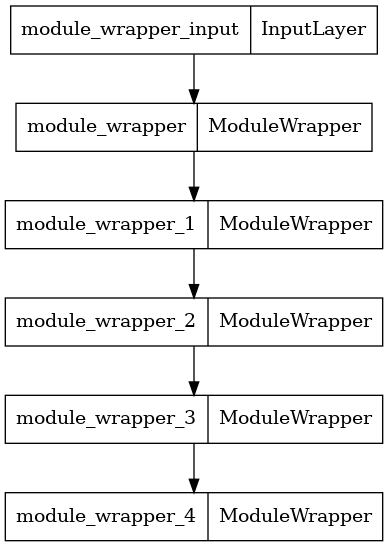

In [6]:
from IPython.display import SVG
model.summary()
tf.keras.utils.plot_model(model)

##### Tensorboard

In [11]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [10]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 52048), started 0:10:25 ago. (Use '!kill 52048' to kill it.)

### (2) Functional 모델 학습 설정